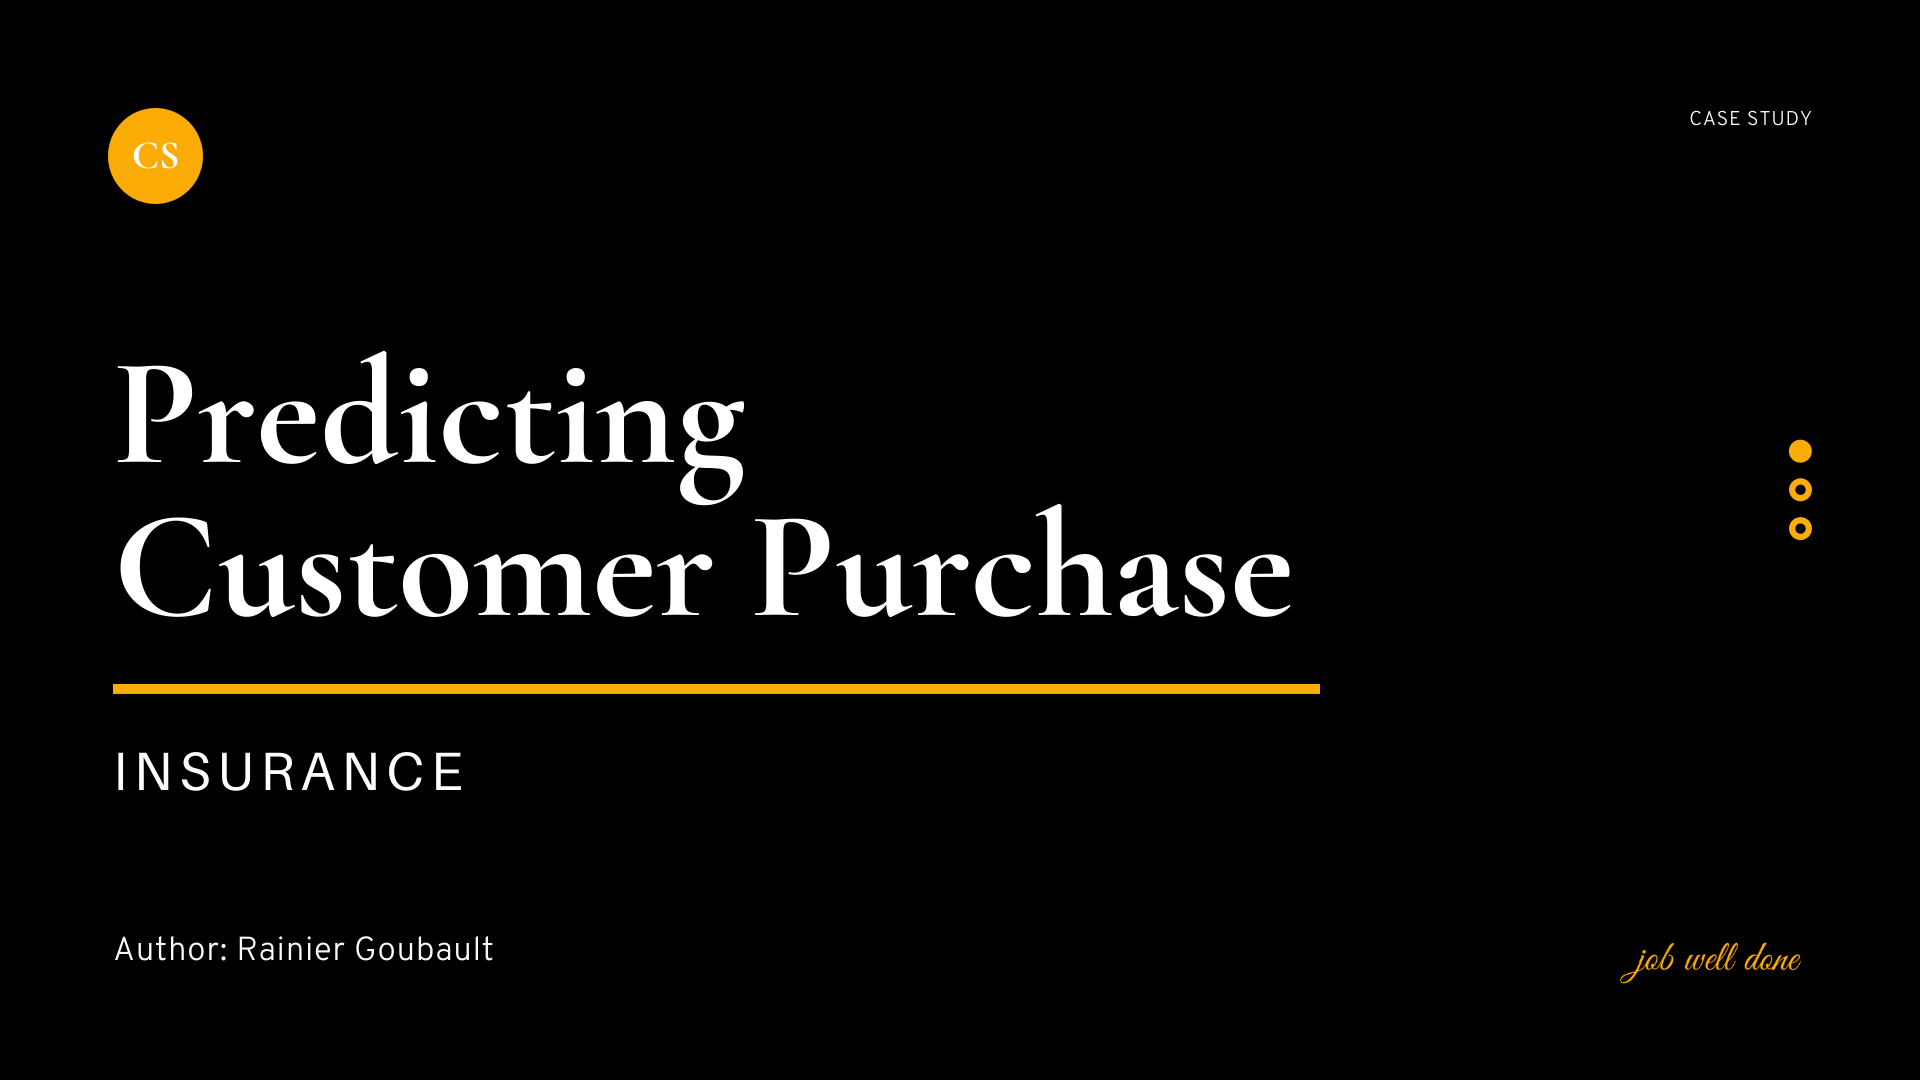

###### Checkout my LinkedIn profile [here](https://www.linkedin.com/in/rainiergoubault/). To see more case studies, checkout my machine learning portfolio [here](https://github.com/rgoubault/machine-learning-portfolio).

###### The data was sourced from [here](https://www.kaggle.com/kondla/carinsurance).

# Objective:

    1. Build a prediction model that will classify whether customers will purchase car insurance or not.

# Introduction:

We have data from one bank in the United States. Besides their usual services, this bank recently started to also provides car insurance services. The data is related with direct marketing campaigns (phone calls). The bank organizes regular campaigns to attract new clients. The bank has potential customers’ data, and bank’s employees call them for advertising available car insurance options. We are provided with general information about clients (age, job, etc.) as well as more specific information about the current insurance sell campaign (communication, last contact day) and previous campaigns (attributes like previous attempts, outcome).

# 1. Gather The Data

## 1.1 Import Libraries

In [1]:
# Warning
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import numpy as np 
import pandas as pd

# Statistics
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats import mannwhitneyu

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf

import plotly
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from plotly.offline import iplot
from plotly.subplots import make_subplots

# Preprocessing 
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, OrdinalEncoder

# Model Evaluation
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, precision_score, recall_score

# Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

# Set visualiation options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_style('white')

import plotly.io as pio
pio.renderers.default = 'notebook_connected'

cf.go_offline()

# Set notebook options
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', 100) # display 100 rows

# Set pipeline display options
from sklearn import set_config
set_config(display='diagram')

%load_ext watermark

In [2]:
# Check the version history of libraries imported
%watermark -iv

sklearn   : 1.0.1
cufflinks : 0.17.3
matplotlib: 3.5.0
plotly    : 5.4.0
numpy     : 1.21.4
scipy     : 1.7.3
json      : 2.0.9
pandas    : 1.3.4
seaborn   : 0.11.2



Now that we have imported our libraries and checked their version history it is time to import the data.

## 1.2 Import The Data

In [3]:
raw_data = pd.read_csv('../02-data/customer-purchase-insurance-train.csv')
data = raw_data.copy()
print('The data has been successfully imported!')

The data has been successfully imported!


Let's examine the first 5 entries in the data.

In [4]:
data.head()

Id  Age          Job  Marital Education  Default  Balance  HHInsurance  \
0   1   32   management   single  tertiary        0     1218            1   
1   2   32  blue-collar  married   primary        0     1156            1   
2   3   29   management   single  tertiary        0      637            1   
3   4   25      student   single   primary        0      373            1   
4   5   30   management  married  tertiary        0     2694            0   

   CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
0        0     telephone              28              jan             2   
1        0           NaN              26              may             5   
2        0      cellular               3              jun             1   
3        0      cellular              11              may             2   
4        0      cellular               3              jun             1   

   DaysPassed  PrevAttempts  Outcome CallStart   CallEnd  CarInsurance  
0          -1             0      NaN  13:45:20  13:46:30             0  
1          -1             0      NaN  14:49:03  14:52:08             0  
2         119             1  failure  16:30:24  16:36:04             1  
3          -1             0      NaN  12:06:43  12:20:22             1  
4          -1             0      NaN  14:35:44  14:38:56             0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [6]:
data.shape

(4000, 19)

The data has 4,000 rows and 19 columns. Each row represents a single customer and each column a different attribute about the customer.

Our target variabe - **'CarInsurance'**, which is binary (1/0). "1" means that the customer has agreed to the offer, "0" means that not.

Eighteen features overview:

- **Id** - Unique ID number
- **Age** - Age of the customer
- **Job** - Job of the customer 
- **Marital** - Marital status of the customer
- **Education** - Education level of the customer
- **Default** - Has credit in default? "yes" - 1,"no" - 0
- **Balance** - Customer average yearly balance, in USD
- **HHInsurance** - Is household insured? "yes" - 1,"no" - 0
- **CarLoan** - Has the client a car loan? "yes" - 1,"no" - 0
- **Communication** - Contact communication type
- **LastContactMonth** - Month of the last contact
- **LastContactDay** - Day of the last contact
- **NoOfContacts** - Number of contacts performed during this campaign for this customer
- **DaysPassed** - Number of days that passed by after the customer was last contacted from a previous campaign (-1 means not previously contacted)
- **PrevAttempts** - Number of contacts performed before this campaign and for this customer
- **Outcome** - Outcome of the previous marketing campaign
- **CallStart** - Start time of the last call 
- **CallEnd** - End time of the last call

### Data Types

In [7]:
print('Count of Features by Data Type:')
data.dtypes.value_counts()

Count of Features by Data Type:


int64     11
object     8
dtype: int64

### Constant Values

In [8]:
constant_values = data.nunique()
constant_values = [i for i,v in enumerate(constant_values) if v ==1]
constant_values

[]

The data does not contain any constant values

### Unique Values

In [9]:
# Find how many unique values numerical features have
for feature in data.select_dtypes(include='number').columns:
    print(f'{feature} feature has {data[feature].nunique()} unique values.')

Id feature has 4000 unique values.
Age feature has 70 unique values.
Default feature has 2 unique values.
Balance feature has 2178 unique values.
HHInsurance feature has 2 unique values.
CarLoan feature has 2 unique values.
LastContactDay feature has 31 unique values.
NoOfContacts feature has 35 unique values.
DaysPassed feature has 330 unique values.
PrevAttempts feature has 20 unique values.
CarInsurance feature has 2 unique values.


**'Id'** contains all unique values, which is a specific unique id to each customer. We will drop this feature as it's not useful.

**'Age' 'Balance' and 'DaysPassed'** have high number of unique values.

**'Default', 'HHInsurance' and 'CarLoan'** appear to be binary categorical features (i.e. unique value = 2) that were encoded to numerical values. 

**'LastContactDay'** which represents the contact day of the month, is also a categorical feature that was encoded to numerical values (i.e. 31 unique values with each value representing a day in the month). 

We will convert these binary features data type to categorical for EDA.

**'CarInsurance'** is the target feature. Is also a binary feature that was encoded to numerical values.

In [10]:
data.drop('Id', axis=1, inplace=True)
data.shape

(4000, 18)

The **'Id'** feature was dropped from the data. We are down to 18 features in the data.

In [11]:
# Convert to categorical features
obj_features = ['Default', 'HHInsurance', 'CarLoan', 'LastContactDay']

for feature in obj_features:
    data[feature] = data[feature].astype('object')

In [12]:
# Find how many unique values categorical features have
for feature in data.select_dtypes(include='object').columns:
    print(f'{feature} feature has {data[feature].nunique()} unique values.')

Job feature has 11 unique values.
Marital feature has 3 unique values.
Education feature has 3 unique values.
Default feature has 2 unique values.
HHInsurance feature has 2 unique values.
CarLoan feature has 2 unique values.
Communication feature has 2 unique values.
LastContactDay feature has 31 unique values.
LastContactMonth feature has 12 unique values.
Outcome feature has 3 unique values.
CallStart feature has 3777 unique values.
CallEnd feature has 3764 unique values.


Categorical features has low cardinality (i.e. # of unique values). **'CallStart'** and **'CallEnd'** are date/time features.

In [13]:
# Convert to date/time features
date_time_features = ['CallStart', 'CallEnd']

for feature in date_time_features:
    data[feature] = pd.to_datetime(data[feature])

In [14]:
print('Count of Features by Data Type:')
data.dtypes.value_counts()

Count of Features by Data Type:


object            10
int64              6
datetime64[ns]     2
dtype: int64

### Duplicate Values

In [15]:
duplicates = data.duplicated()

In [16]:
print(f'The number of duplicate values in the data: {duplicates.sum()}')

The number of duplicate values in the data: 0


The data does not contain duplicate values

### Missing Values

In [17]:
missing = data.isna()

In [18]:
print(f'Does the data contain missing values:\n\n{missing.any()}')

Does the data contain missing values:

Age                 False
Job                  True
Marital             False
Education            True
Default             False
Balance             False
HHInsurance         False
CarLoan             False
Communication        True
LastContactDay      False
LastContactMonth    False
NoOfContacts        False
DaysPassed          False
PrevAttempts        False
Outcome              True
CallStart           False
CallEnd             False
CarInsurance        False
dtype: bool


**'Job', 'Education', 'Communication'** and **'Outcome'** feature contain missing values.

In [19]:
def missing_data(data):
    # Get missing values
    missing = data.isna()
    # Calcualte the total number of missing values
    total_missing = missing.sum().sort_values(ascending=False)
    # Calculate the percentage of missing values
    percent_missing = 100 * (total_missing / missing.count()).sort_values(ascending=False)
    # Combine results into dataframe
    missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent Missing'])
    
    return missing_data

missing = missing_data(data)
missing

Total Missing  Percent Missing
Outcome                    3042           76.050
Communication               902           22.550
Education                   169            4.225
Job                          19            0.475
Age                           0            0.000
NoOfContacts                  0            0.000
CallEnd                       0            0.000
CallStart                     0            0.000
PrevAttempts                  0            0.000
DaysPassed                    0            0.000
LastContactDay                0            0.000
LastContactMonth              0            0.000
CarLoan                       0            0.000
HHInsurance                   0            0.000
Balance                       0            0.000
Default                       0            0.000
Marital                       0            0.000
CarInsurance                  0            0.000

In [20]:
px.bar(missing, x=missing.index, y=missing['Percent Missing'],
       title='<b> Percentage of Missing Data by Feature<b>')

As we saw above:

- **'Outcome'** contains 3042 (76.050% of its distribution) missing values.
- **'Communication'** contains 902 (22.550% of its distribution) missing values.
- **'Education'** contains 169 (4.225% of its distribution) missing values.
- **'Job'** contains 19 (0.475% of its distribution) missing values.

Let's examine why these values are missing in the data

In [21]:
job_missing = data[data['Job'].isna()]
job_missing.head()

Age  Job   Marital  Education Default  Balance HHInsurance CarLoan  \
27    45  NaN  divorced        NaN       0        0           0       0   
239   41  NaN    single        NaN       0      942           0       0   
486   54  NaN   married    primary       0      981           0       0   
536   33  NaN    single  secondary       0     1522           0       1   
605   53  NaN   married    primary       0      732           0       0   

    Communication LastContactDay LastContactMonth  NoOfContacts  DaysPassed  \
27       cellular             21              apr             3          -1   
239      cellular             27              oct             1         188   
486      cellular             22              aug            12          -1   
536      cellular             19              nov             1          -1   
605      cellular             27              oct             2          -1   

     PrevAttempts  Outcome           CallStart             CallEnd  \
27              0      NaN 2021-12-09 12:33:22 2021-12-09 12:38:00   
239             1  success 2021-12-09 16:39:43 2021-12-09 16:42:06   
486             0      NaN 2021-12-09 11:31:36 2021-12-09 11:42:27   
536             0      NaN 2021-12-09 12:44:40 2021-12-09 13:00:46   
605             0      NaN 2021-12-09 09:01:01 2021-12-09 09:13:40   

     CarInsurance  
27              1  
239             1  
486             0  
536             0  
605             1

In [22]:
education_missing = data[data['Education'].isna()]
education_missing.head()

Age         Job   Marital Education Default  Balance HHInsurance CarLoan  \
14   25    services    single       NaN       0     2022           0       0   
27   45         NaN  divorced       NaN       0        0           0       0   
50   54    services  divorced       NaN       0        0           1       0   
53   78     retired   married       NaN       0     3208           0       0   
58   34  management    single       NaN       0     6013           1       0   

   Communication LastContactDay LastContactMonth  NoOfContacts  DaysPassed  \
14      cellular             29              jul             8          97   
27      cellular             21              apr             3          -1   
50      cellular             16              apr             1          -1   
53     telephone             20              may             3          -1   
58      cellular             18              may             1          -1   

    PrevAttempts Outcome           CallStart             CallEnd  CarInsurance  
14            12   other 2021-12-09 14:15:09 2021-12-09 14:19:45             1  
27             0     NaN 2021-12-09 12:33:22 2021-12-09 12:38:00             1  
50             0     NaN 2021-12-09 16:18:17 2021-12-09 16:22:40             0  
53             0     NaN 2021-12-09 16:00:27 2021-12-09 16:06:18             1  
58             0     NaN 2021-12-09 13:52:00 2021-12-09 14:02:12             1

In [23]:
communication_missing = data[data['Communication'].isna()]
communication_missing.head()

Age            Job   Marital  Education Default  Balance HHInsurance  \
1    32    blue-collar   married    primary       0     1156           1   
7    35     management  divorced   tertiary       0      538           1   
13   38  self-employed  divorced  secondary       0     2674           1   
20   57    blue-collar   married  secondary       0      773           1   
28   34       services   married  secondary       0      -62           1   

   CarLoan Communication LastContactDay LastContactMonth  NoOfContacts  \
1        0           NaN             26              may             5   
7        0           NaN             12              may             4   
13       0           NaN             19              jun             2   
20       1           NaN             18              jun             8   
28       0           NaN             16              jun             3   

    DaysPassed  PrevAttempts Outcome           CallStart             CallEnd  \
1           -1             0     NaN 2021-12-09 14:49:03 2021-12-09 14:52:08   
7           -1             0     NaN 2021-12-09 15:39:43 2021-12-09 15:40:49   
13          -1             0     NaN 2021-12-09 10:29:56 2021-12-09 10:32:39   
20          -1             0     NaN 2021-12-09 09:05:50 2021-12-09 09:07:27   
28          -1             0     NaN 2021-12-09 13:50:40 2021-12-09 13:52:29   

    CarInsurance  
1              0  
7              0  
13             0  
20             0  
28             0

In [24]:
outcome_missing = data[data['Outcome'].isna()]
outcome_missing.head()

Age          Job  Marital Education Default  Balance HHInsurance CarLoan  \
0   32   management   single  tertiary       0     1218           1       0   
1   32  blue-collar  married   primary       0     1156           1       0   
3   25      student   single   primary       0      373           1       0   
4   30   management  married  tertiary       0     2694           0       0   
6   37       admin.   single  tertiary       0     1000           1       0   

  Communication LastContactDay LastContactMonth  NoOfContacts  DaysPassed  \
0     telephone             28              jan             2          -1   
1           NaN             26              may             5          -1   
3      cellular             11              may             2          -1   
4      cellular              3              jun             1          -1   
6      cellular             17              mar             1          -1   

   PrevAttempts Outcome           CallStart             CallEnd  CarInsurance  
0             0     NaN 2021-12-09 13:45:20 2021-12-09 13:46:30             0  
1             0     NaN 2021-12-09 14:49:03 2021-12-09 14:52:08             0  
3             0     NaN 2021-12-09 12:06:43 2021-12-09 12:20:22             1  
4             0     NaN 2021-12-09 14:35:44 2021-12-09 14:38:56             0  
6             0     NaN 2021-12-09 13:00:02 2021-12-09 13:03:17             1

When examining the missing values, we can conclude:

- **'Job'** and **'Education'**: 
The missing values are most likely because the customer didn't specify this information.

- **'Communication'**: 
The missing values are most likely becuase the organization forgot to specify this information.

- **'Outcome'**: 
The missing values are because some customers haven't been offered anything before, so there is no outcome.

# 2. Exploratory Data Analysis

## 2.1 Target Feature

Let's examine the target feature: **'CarInsurance'**

In [25]:
target = pd.DataFrame(data['CarInsurance'])

### 2.1.1 Statistical Summary

In [26]:
target.describe()

CarInsurance
count   4000.000000
mean       0.401000
std        0.490162
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000

### 2.1.2 Distribution

In [27]:
target_count = target.value_counts()
target_count

CarInsurance
0               2396
1               1604
dtype: int64

In [28]:
fig = px.histogram(target,
                   title='<b>Target Feature Distribution<b>')
fig

In [29]:
target_percent = target.value_counts(normalize=True) * 100
target_percent

CarInsurance
0               59.9
1               40.1
dtype: float64

In [30]:
labels = data['CarInsurance'].unique()
values = data['CarInsurance'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.2)])
fig.update_layout(title_text='<b>Target Feature Distribution<b>')
fig.show()

We note the following about the target feature **CarInsurance**:

- Already numerical. 
- **'0'** denotes that customer *did not subscribe* to car insurance, while **'1'** denotes that customer *did subscribe* to car insurance.
- 2396 (**59.9%**) of customers *did not subscribe* to car insurance, while 1604 (**40.1%**) of customers *did subscribe* to car insurance.
- The target feature is imbalanced.

## 2.2 Numerical Features

Next, we'll examine the numerical features in the data.

In [31]:
# Get numerical features
num = data.drop('CarInsurance', axis=1).select_dtypes(include='number').columns

In [32]:
data[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           4000 non-null   int64
 1   Balance       4000 non-null   int64
 2   NoOfContacts  4000 non-null   int64
 3   DaysPassed    4000 non-null   int64
 4   PrevAttempts  4000 non-null   int64
dtypes: int64(5)
memory usage: 156.4 KB


In [33]:
data[num].shape

(4000, 5)

In [34]:
# Let's look at numerical features
data[num].head()

Age  Balance  NoOfContacts  DaysPassed  PrevAttempts
0   32     1218             2          -1             0
1   32     1156             5          -1             0
2   29      637             1         119             1
3   25      373             2          -1             0
4   30     2694             1          -1             0

### 2.2.1 Univariate Analysis

#### Statistical Summary

In [35]:
data[num].describe().T.style.background_gradient(subset=['count', 'mean','std','50%'], cmap='RdPu').format('{:.2f}')

We can note the following:

    - The data contains 5 numerical features.
    - Numerical features are not missing values (i.e count = 4000, which is the sum of the entries).
    - Numerical features have varying scales of magnitude (i.e. min / max). 
    - All numerical features appear to have right skew (i.e. the mean is greater than the median (50%).
    - Some values seem suspicious and maybe outliers:
        - max 'Age' = 95 years old. We have a real survivor here.
        - max 'Balance' = 98,417, when the mean = 1,532 and 75% = 1,619. This person is very rich.
        - min 'Balance' = -3,058. Did this person spend all the credit money and didn't pay it back?
        - max 'NoOfContact' = 43, when the mean = 2.61 and 75% = 3. Did you bank really contact someone 43 times?
        - max 'DaysPassed' = 854. Did the bank not contact someone for 854 days, almost 3 years?
        - max 'PrevAttempts' = 58, when the mean is 0.72?

Let's look at these suspicious values

In [36]:
data[data['Age']==95]

Age      Job   Marital Education Default  Balance HHInsurance CarLoan  \
3837   95  retired  divorced   primary       0     2282           0       0   

     Communication LastContactDay LastContactMonth  NoOfContacts  DaysPassed  \
3837     telephone             21              apr            17          -1   

      PrevAttempts Outcome           CallStart             CallEnd  \
3837             0     NaN 2021-12-09 16:56:10 2021-12-09 16:59:37   

      CarInsurance  
3837             1

In [37]:
data[data['Balance']==98417]

Age         Job  Marital Education Default  Balance HHInsurance CarLoan  \
1742   59  management  married  tertiary       0    98417           0       0   

     Communication LastContactDay LastContactMonth  NoOfContacts  DaysPassed  \
1742     telephone             20              nov             5          -1   

      PrevAttempts Outcome           CallStart             CallEnd  \
1742             0     NaN 2021-12-09 10:51:42 2021-12-09 10:54:07   

      CarInsurance  
1742             0

In [38]:
data[data['Balance']==-3058]

Age            Job  Marital Education Default  Balance HHInsurance  \
3464   39  self-employed  married  tertiary       0    -3058           1   

     CarLoan Communication LastContactDay LastContactMonth  NoOfContacts  \
3464       1      cellular             17              apr             3   

      DaysPassed  PrevAttempts Outcome           CallStart  \
3464          -1             0     NaN 2021-12-09 13:49:18   

                 CallEnd  CarInsurance  
3464 2021-12-09 14:04:00             1

Let's check how many customers carry a negative average yearly balance.

In [39]:
neg_balance = (data['Balance'] < 0)
print(f'The # of customers with a negative average yearly balance: {neg_balance.sum()}')

The # of customers with a negative average yearly balance: 265


In [40]:
# Let's look at the customers with a negtive average yearly balance
data[neg_balance].head()

Age          Job  Marital  Education Default  Balance HHInsurance CarLoan  \
11   53  blue-collar  married    primary       1     -462           0       0   
28   34     services  married  secondary       0      -62           1       0   
63   60     services  married  secondary       0      -46           0       0   
86   40  blue-collar  married  secondary       1      -94           1       1   
91   33  blue-collar   single  secondary       0     -147           1       0   

   Communication LastContactDay LastContactMonth  NoOfContacts  DaysPassed  \
11      cellular             29              jan             1          -1   
28           NaN             16              jun             3          -1   
63           NaN             23              may             2          -1   
86           NaN              7              may             1          -1   
91           NaN             30              may             2          -1   

    PrevAttempts Outcome           CallStart             CallEnd  CarInsurance  
11             0     NaN 2021-12-09 16:45:50 2021-12-09 16:53:40             1  
28             0     NaN 2021-12-09 13:50:40 2021-12-09 13:52:29             0  
63             0     NaN 2021-12-09 16:36:39 2021-12-09 16:38:51             0  
86             0     NaN 2021-12-09 11:24:19 2021-12-09 11:28:06             0  
91             0     NaN 2021-12-09 16:00:27 2021-12-09 16:11:19             0

In [41]:
data[data['NoOfContacts']==43]

Age          Job  Marital  Education Default  Balance HHInsurance  \
3168   33  blue-collar  married  secondary       0        0           1   

     CarLoan Communication LastContactDay LastContactMonth  NoOfContacts  \
3168       1      cellular             31              jul            43   

      DaysPassed  PrevAttempts Outcome           CallStart  \
3168          -1             0     NaN 2021-12-09 17:56:12   

                 CallEnd  CarInsurance  
3168 2021-12-09 17:56:28             0

In [42]:
data[data['DaysPassed']==854]

Age         Job   Marital Education Default  Balance HHInsurance  \
3590   37  management  divorced  tertiary       0      488           1   

     CarLoan Communication LastContactDay LastContactMonth  NoOfContacts  \
3590       0      cellular             17              sep             1   

      DaysPassed  PrevAttempts  Outcome           CallStart  \
3590         854             2  failure 2021-12-09 10:43:12   

                 CallEnd  CarInsurance  
3590 2021-12-09 10:48:40             1

In [43]:
data[data['PrevAttempts']==58]

Age          Job  Marital Education Default  Balance HHInsurance  \
2354   46  blue-collar  married   primary       0     1085           1   

     CarLoan Communication LastContactDay LastContactMonth  NoOfContacts  \
2354       1      cellular             15              may             2   

      DaysPassed  PrevAttempts Outcome           CallStart  \
2354         353            58   other 2021-12-09 15:05:29   

                 CallEnd  CarInsurance  
2354 2021-12-09 15:14:12             1

Looking at this data it is impossible to say that there are definitely some errors in the data. Perhaps everything is correct. Later we will visualize the data and decide what to do with suspicious values.

#### Scatterplot Distribution 

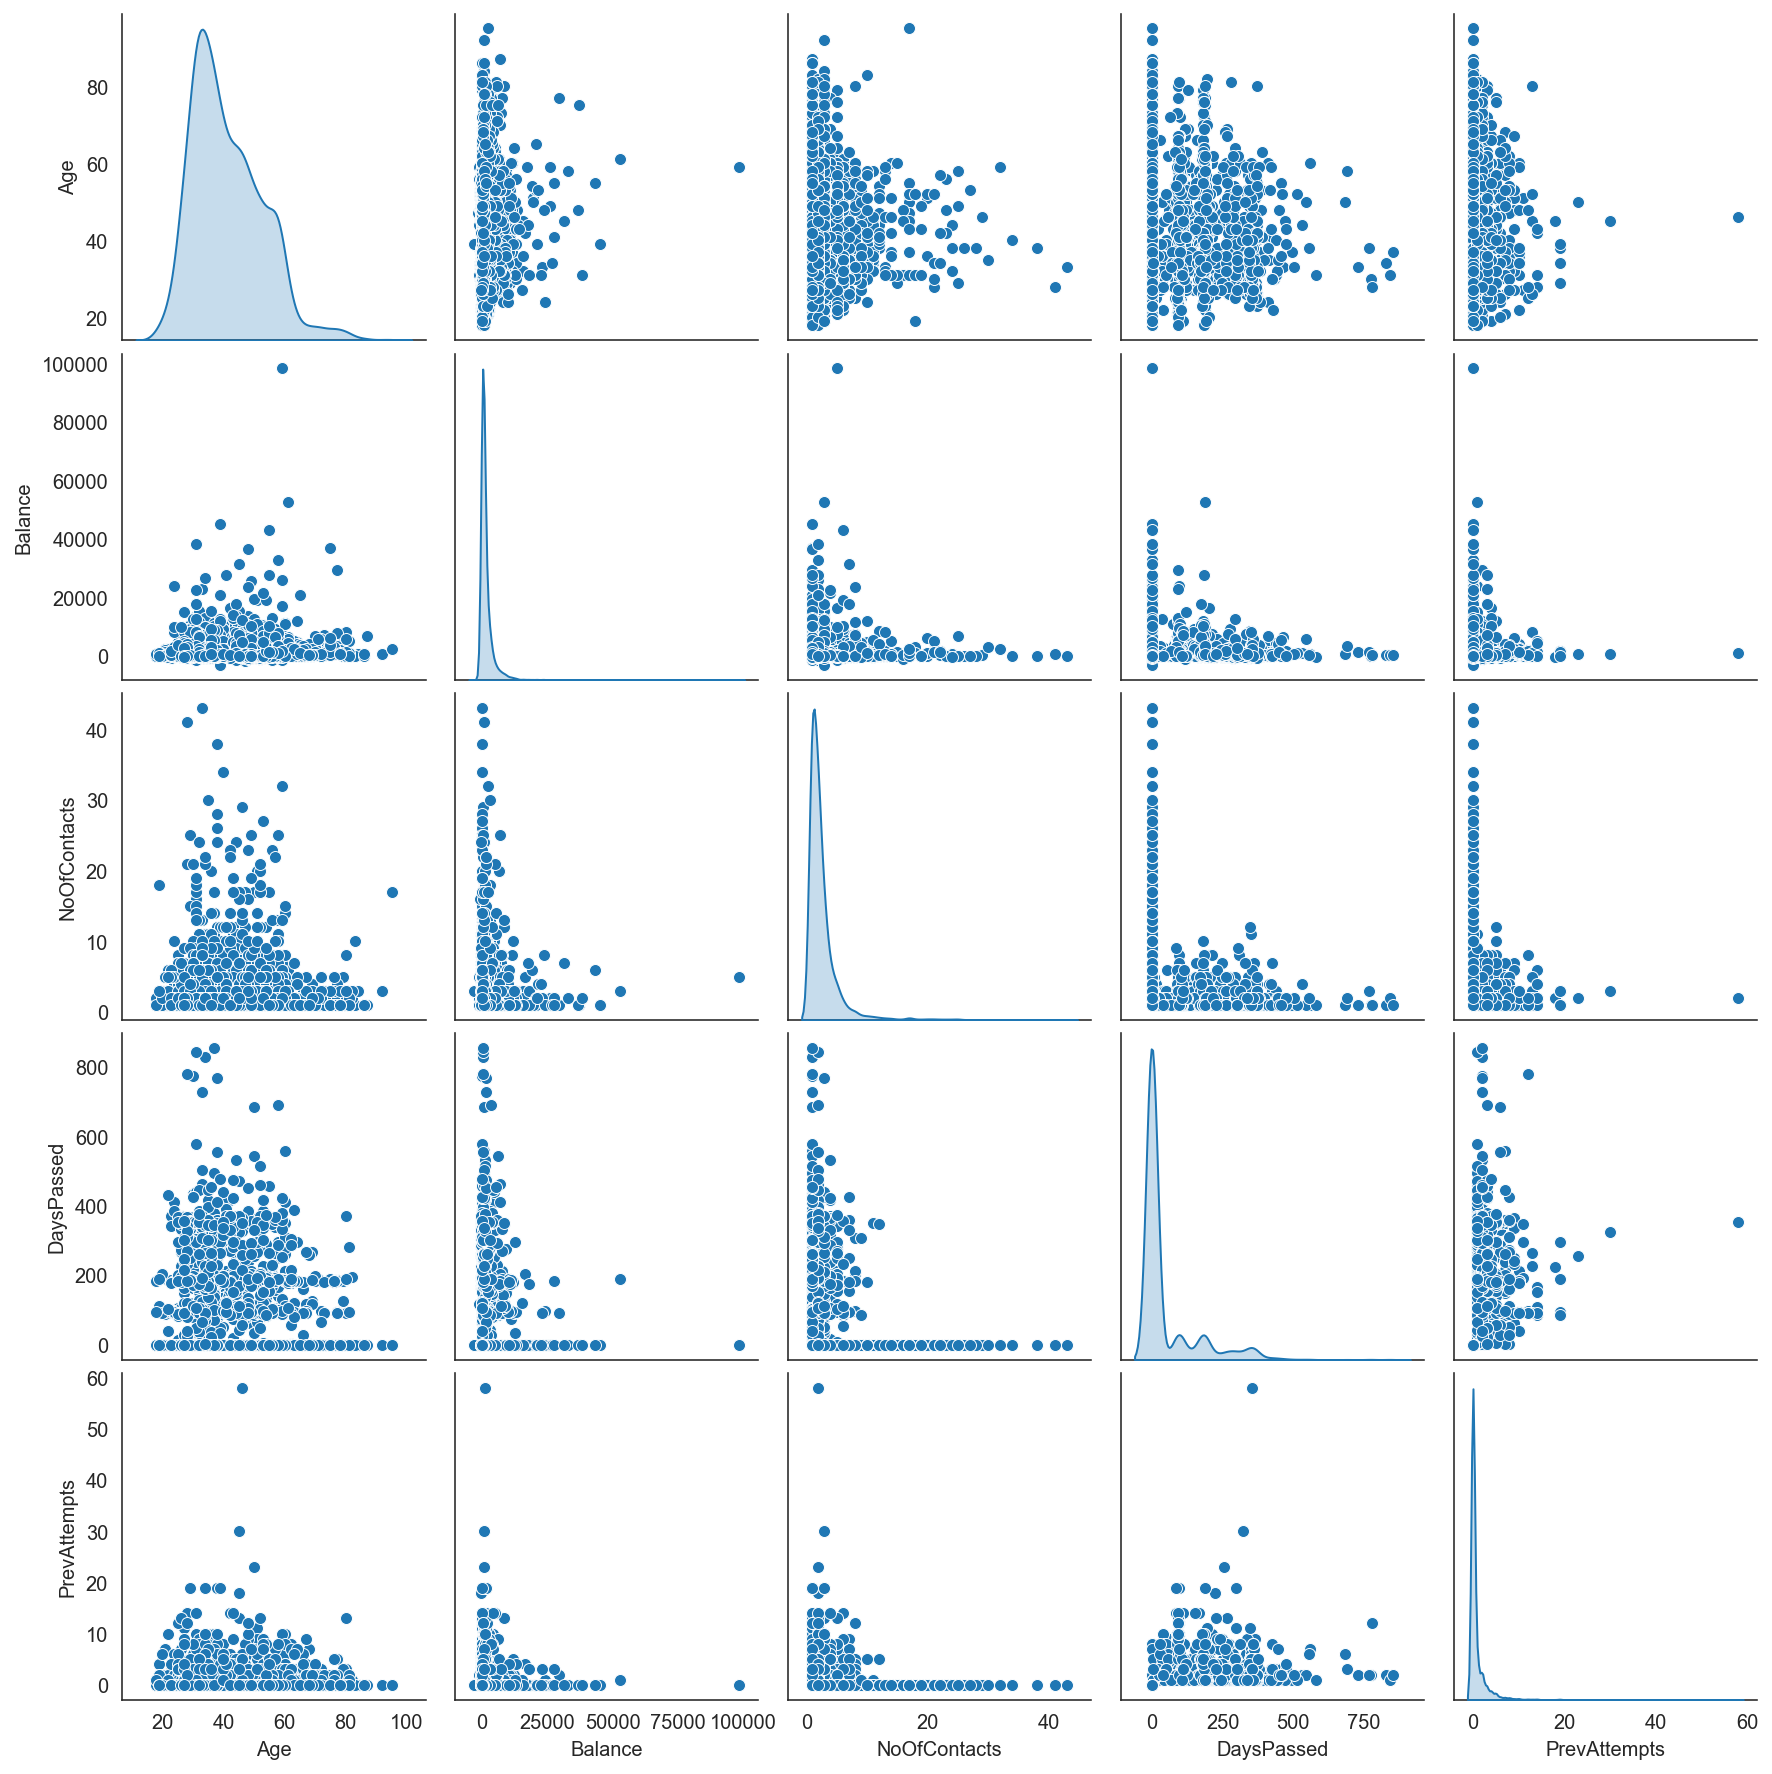

In [44]:
sns.pairplot(data[num], diag_kind='kde');

#### Histogram Distribution

In [45]:
fig = data[num].iplot(kind='hist', subplots=True, bins=50,
                     title='<b>Histogram Distribution of Numerical Features<b>')
fig

In [46]:
for feature in data[num]:
    data[feature].iplot(kind='hist', bins=50, 
                        title=f'<b>Histogram Distribution of {feature}<b>')   

The numerical features distribution are right skewed. 

#### Boxplots Distributions

In [47]:
fig = data[num].iplot(kind='box', subplots=True, bins=10, boxpoints='all',
                     title='<b>Boxplot Distribution of Numerical Features<b>')
fig

In [48]:
for feature in data[num]:
    data[feature].iplot(kind='box', boxpoints='all',
                        title=f'<b>Boxplot Distribution of {feature}<b>')

### 2.2.2. Skew & Kurtosis

In [49]:
skew_limit = 0.75
skew_vals = data[num].skew()
skew_feats = skew_vals[abs(skew_vals) > skew_limit]
skew_feats = pd.DataFrame(skew_feats, columns=['Skew'])
skew_feats.sort_values(by='Skew', ascending=False, inplace=True)
skew_feats

Skew
Balance       9.877895
PrevAttempts  8.932735
NoOfContacts  5.241314
DaysPassed    2.536872
Age           0.763293

In [50]:
kurt_limit = 1
kurt_vals = data[num].kurt()
kurt_feats = kurt_vals[abs(kurt_vals) > kurt_limit]
kurt_feats = pd.DataFrame(kurt_feats, columns=['Kurt'])
kurt_feats.sort_values(by='Kurt', ascending=False, inplace=True)
kurt_feats

Kurt
Balance       185.055975
PrevAttempts  170.039968
NoOfContacts   40.191337
DaysPassed      7.537368

### 2.2.3 Bivariate Analysis (vs. Target Feature)

Let's examine the influence of numerical features on the target variable

#### GroupBy

In [51]:
data.groupby(by='CarInsurance')[num].describe().T

CarInsurance                   0             1
Age          count   2396.000000   1604.000000
             mean      40.844741     41.767456
             std       10.253331     13.237319
             min       19.000000     18.000000
             25%       33.000000     32.000000
             50%       39.000000     39.000000
             75%       48.000000     50.000000
             max       83.000000     95.000000
Balance      count   2396.000000   1604.000000
             mean    1413.544658   1711.281796
             std     3644.867764   3295.204444
             min    -1730.000000  -3058.000000
             25%       65.000000    207.750000
             50%      457.000000    700.000000
             75%     1347.500000   2010.750000
             max    98417.000000  52587.000000
NoOfContacts count   2396.000000   1604.000000
             mean       2.895242      2.177057
             std        3.562312      2.038267
             min        1.000000      1.000000
             25%        1.000000      1.000000
             50%        2.000000      2.000000
             75%        3.000000      3.000000
             max       43.000000     29.000000
DaysPassed   count   2396.000000   1604.000000
             mean      36.579716     66.821072
             std       94.850661    120.017793
             min       -1.000000     -1.000000
             25%       -1.000000     -1.000000
             50%       -1.000000     -1.000000
             75%       -1.000000     95.000000
             max      779.000000    854.000000
PrevAttempts count   2396.000000   1604.000000
             mean       0.464524      1.095387
             std        1.544603      2.641197
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        0.000000      0.000000
             75%        0.000000      1.000000
             max       23.000000     58.000000

#### Boxplot Distributions

In [52]:
num_target = data.select_dtypes(include='number').columns
num_target

Index(['Age', 'Balance', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'CarInsurance'],
      dtype='object')

In [53]:
for feature in data[num]:
    fig = px.box(data[num_target], x='CarInsurance', y=feature,
                 title=f'<b>{feature} Distribution by Target Feature<b>')
    fig.show()

### 2.2.4 Relationships

#### Correlation Matrix + Heatmap

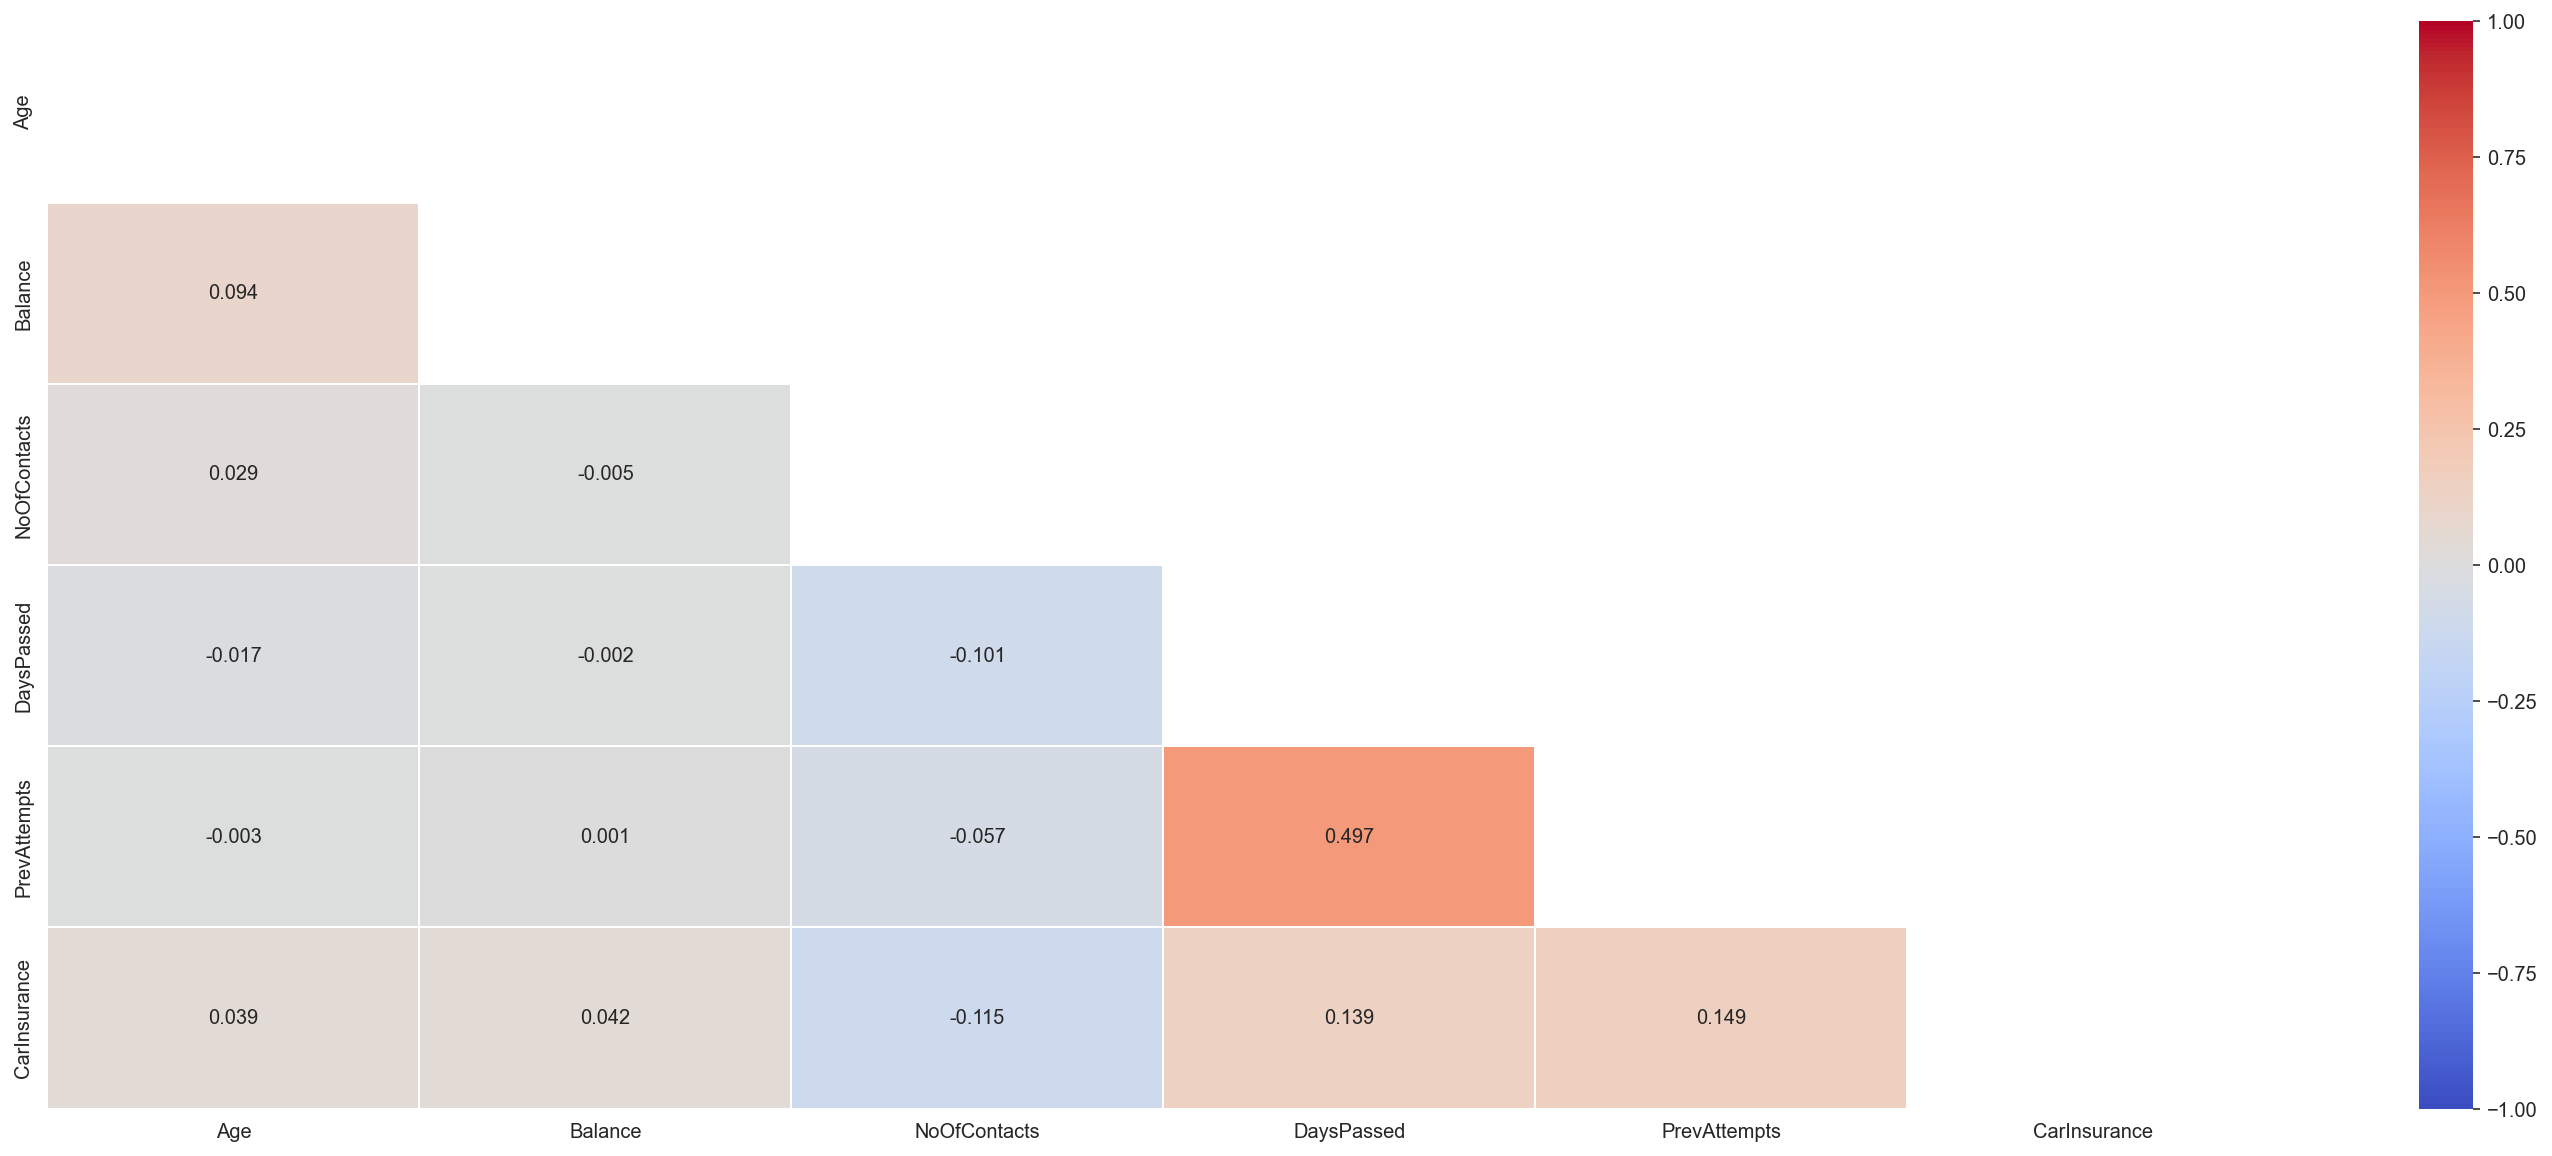

In [54]:
plt.figure(figsize=(25, 10))

corr_matrix = data[num_target].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

ax = sns.heatmap(corr_matrix, 
                 mask=mask, 
                 xticklabels=corr_matrix.columns, 
                 yticklabels=corr_matrix.columns, 
                 annot=True,
                 fmt='.3f',
                 linewidths=.2, 
                 cmap='coolwarm', 
                 vmin=-1, vmax=1);

## 2.3 Categorical Features

Now its time to explore the data categorical features

In [55]:
# Get categorical features
cat = data.drop('CarInsurance', axis=1).select_dtypes(include='object').columns

In [56]:
data[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Job               3981 non-null   object
 1   Marital           4000 non-null   object
 2   Education         3831 non-null   object
 3   Default           4000 non-null   object
 4   HHInsurance       4000 non-null   object
 5   CarLoan           4000 non-null   object
 6   Communication     3098 non-null   object
 7   LastContactDay    4000 non-null   object
 8   LastContactMonth  4000 non-null   object
 9   Outcome           958 non-null    object
dtypes: object(10)
memory usage: 312.6+ KB


In [57]:
data[cat].shape

(4000, 10)

In [58]:
# Look at the categorical features
data[cat].head()

Job  Marital Education Default HHInsurance CarLoan Communication  \
0   management   single  tertiary       0           1       0     telephone   
1  blue-collar  married   primary       0           1       0           NaN   
2   management   single  tertiary       0           1       0      cellular   
3      student   single   primary       0           1       0      cellular   
4   management  married  tertiary       0           0       0      cellular   

  LastContactDay LastContactMonth  Outcome  
0             28              jan      NaN  
1             26              may      NaN  
2              3              jun  failure  
3             11              may      NaN  
4              3              jun      NaN

### 2.3.1 Univariate Analysis

#### Statistical Summary

In [59]:
data[cat].describe().T.style.background_gradient(subset=['count', 'unique','freq'], cmap='RdPu')

#### Unique Values

In [60]:
for feature in data[cat]:
    print(f'{feature} feature has {data[feature].nunique()} unique values.\n')
    print(f'{data[feature].unique()}\n\n')    

Job feature has 11 unique values.

['management' 'blue-collar' 'student' 'technician' 'admin.' 'services'
 'self-employed' 'retired' nan 'housemaid' 'entrepreneur' 'unemployed']


Marital feature has 3 unique values.

['single' 'married' 'divorced']


Education feature has 3 unique values.

['tertiary' 'primary' 'secondary' nan]


Default feature has 2 unique values.

[0 1]


HHInsurance feature has 2 unique values.

[1 0]


CarLoan feature has 2 unique values.

[0 1]


Communication feature has 2 unique values.

['telephone' nan 'cellular']


LastContactDay feature has 31 unique values.

[28 26 3 11 22 17 12 18 1 29 27 19 6 5 8 21 9 20 16 30 2 13 14 15 23 4 7
 10 24 25 31]


LastContactMonth feature has 12 unique values.

['jan' 'may' 'jun' 'mar' 'nov' 'jul' 'aug' 'sep' 'apr' 'feb' 'oct' 'dec']


Outcome feature has 3 unique values.

[nan 'failure' 'other' 'success']




#### Histogram Distribution

In [61]:
fig = data[cat].iplot(kind='hist', subplots=True,
                      title='<b>Histogram Distribution of Categorical Features<b>')
fig

We note the following:

**Job**: 
    
    - Most customers are in management (893) jobs followed closely by blue-collar (759) jobs.
   
**Martial**: 

    - Most customers are married (2034), followed by customers who are single (1213), and then customers who 
      are divorced (483) are the least.
    
**Education**: 

    - Majority of customers have secondary education (1988), followed by tertiary (1282) and primary (561).
                
**Default**: 

    - Majority of customers have not defaulted (3942), while only a small number of customers have defaulted (58).
    
**HHInsurance**: 
    
    - Rougly even split between customers who have house insurance (2029) and customer who do not (1971).
   
**CarLoan**: 

    - Majority of customers do not have a car loan (3468), while the remaining do not (532)
    
**Communication**: 

    - Majority of customers were contacted via cellular (2831), while the remaining via telephone (267).
                
**LastDayContact**: 

    - Hard to discern any real analysis from this feature. 

**LastContactMonth**: 

    - Majority of customers were contact in May (1049), followed by Jul(573) and then Aug (536).
                
**Outcome**: 

    - Most customers outcomes ended in failure (437), followed by success (326), and then other (195) last.

### 2.3.3 Bivariate Analysis (vs. Target Feature)

##### 2.3.3.1 GroupBy

In [62]:
data.groupby('CarInsurance')[cat].describe().T

CarInsurance                       0           1
Job              count          2386        1595
                 unique           11          11
                 top     blue-collar  management
                 freq            540         392
Marital          count          2396        1604
                 unique            3           3
                 top         married     married
                 freq           1471         833
Education        count          2306        1525
                 unique            3           3
                 top       secondary   secondary
                 freq           1258         730
Default          count          2396        1604
                 unique            2           2
                 top               0           0
                 freq           2352        1590
HHInsurance      count          2396        1604
                 unique            2           2
                 top               1           0
                 freq           1380        1013
CarLoan          count          2396        1604
                 unique            2           2
                 top               0           0
                 freq           2016        1452
Communication    count          1662        1436
                 unique            2           2
                 top        cellular    cellular
                 freq           1518        1313
LastContactDay   count          2396        1604
                 unique           31          31
                 top              18          12
                 freq            136          86
LastContactMonth count          2396        1604
                 unique           12          12
                 top             may         may
                 freq            760         289
Outcome          count           399         559
                 unique            3           3
                 top         failure     success
                 freq            261         291

##### 2.3.3.2 Distribution

###### Histograms

In [63]:
for value, feature in enumerate(data[cat]):
    fig = px.histogram(data[feature], color=data['CarInsurance'], barmode='group', 
                       title=f'<b>{feature} by Target Variable<b>')
    fig.show()

# 3. Data Preparation

In [64]:
data = raw_data.copy()
data.head()

Id  Age          Job  Marital Education  Default  Balance  HHInsurance  \
0   1   32   management   single  tertiary        0     1218            1   
1   2   32  blue-collar  married   primary        0     1156            1   
2   3   29   management   single  tertiary        0      637            1   
3   4   25      student   single   primary        0      373            1   
4   5   30   management  married  tertiary        0     2694            0   

   CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
0        0     telephone              28              jan             2   
1        0           NaN              26              may             5   
2        0      cellular               3              jun             1   
3        0      cellular              11              may             2   
4        0      cellular               3              jun             1   

   DaysPassed  PrevAttempts  Outcome CallStart   CallEnd  CarInsurance  
0          -1             0      NaN  13:45:20  13:46:30             0  
1          -1             0      NaN  14:49:03  14:52:08             0  
2         119             1  failure  16:30:24  16:36:04             1  
3          -1             0      NaN  12:06:43  12:20:22             1  
4          -1             0      NaN  14:35:44  14:38:56             0

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [66]:
data.shape

(4000, 19)

## 3.1 Feature Engineering

We will convert our date/time features **'CallStart'** and **'CallEnd'**, and engineer new features that will have an impact on probablity of prediciting customer purchase. Unfortnately, we don't have date features and thus we can't transform features based on dates, for example, when the calls were made. But we are able to work with time features, and we'll add three extra features associated with call times:

1. **CallHourStart**: Start hour of call
2. **CallMinStart**: Start min of call
3. **CallDuration**: Call duration in seconds

In [67]:
# Convert date/time dtype
data['CallStart'] = pd.to_datetime(data['CallStart'])
data['CallEnd'] = pd.to_datetime(data['CallEnd'])

In [68]:
# Create three new features
data['CallDuration'] = (data['CallEnd'] - data['CallStart']).dt.total_seconds()
data['CallHourStart'] = data['CallStart'].apply(lambda t: t.hour)
data['CallMinStart'] = data['CallStart'].apply(lambda t: t.minute)

In [69]:
# Let's look at the new features created
data.head()

Id  Age          Job  Marital Education  Default  Balance  HHInsurance  \
0   1   32   management   single  tertiary        0     1218            1   
1   2   32  blue-collar  married   primary        0     1156            1   
2   3   29   management   single  tertiary        0      637            1   
3   4   25      student   single   primary        0      373            1   
4   5   30   management  married  tertiary        0     2694            0   

   CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
0        0     telephone              28              jan             2   
1        0           NaN              26              may             5   
2        0      cellular               3              jun             1   
3        0      cellular              11              may             2   
4        0      cellular               3              jun             1   

   DaysPassed  PrevAttempts  Outcome           CallStart             CallEnd  \
0          -1             0      NaN 2021-12-09 13:45:20 2021-12-09 13:46:30   
1          -1             0      NaN 2021-12-09 14:49:03 2021-12-09 14:52:08   
2         119             1  failure 2021-12-09 16:30:24 2021-12-09 16:36:04   
3          -1             0      NaN 2021-12-09 12:06:43 2021-12-09 12:20:22   
4          -1             0      NaN 2021-12-09 14:35:44 2021-12-09 14:38:56   

   CarInsurance  CallDuration  CallHourStart  CallMinStart  
0             0          70.0             13            45  
1             0         185.0             14            49  
2             1         340.0             16            30  
3             1         819.0             12             6  
4             0         192.0             14            35

In [70]:
data.shape

(4000, 22)

## 3.2 Split the data into train and test set

We'll separate the data into a train set and test set, getting 10% of the data for the test set.

In [71]:
train, test = train_test_split(data, test_size=.10, random_state=999)
print('The shape of the train set:', train.shape)
print('The shape of the test set:', test.shape)

The shape of the train set: (3600, 22)
The shape of the test set: (400, 22)


In [72]:
# Save train and test set to csv
train.to_csv('../02-data/customer-purchase-insurance-trainset.csv')
test.to_csv('../02-data/customer-purchase-insurance-testset.csv', index=False)
print('CSV file saved!!')

CSV file saved!!


## 3.3 Parition the train data into features (X) and target (y)

At first, we will not work with the date/time features.

In [73]:
X = train.drop(['Id', 'CallStart', 'CallEnd', 'CallDuration', 
               'CallHourStart', 'CallMinStart', 'CarInsurance'], axis=1)

y = train['CarInsurance']

print('The shape of X:', X.shape)
print('The shape of y:', y.shape)

The shape of X: (3600, 15)
The shape of y: (3600,)


## 3.4 Split into training and testing sets

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=999)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2880, 15) (720, 15)
(2880,) (720,)


# 4. Modeling

## 4.1 Metric Selection

As we saw during EDA, the target feature **'CarInsurance'** is imbalanced. 

The exact metric used and the threshold that our model needs to reach depends on the business need. We can tune the model to some extent to optimize for different metrics. 

We'll use:

1. **ROC AUC** metric to evaluate the model.
2. We'll also look at the **Precision** and **Recall** metrics on the test set.


## 4.2 Model Selection

We will try the following models:
    
1. **Logistic Regression**
2. **Support Vector Machine**
3. **KNeighbors**
4. **AdaBoost**
5. **ExtraTrees**
6. **Random Forest**
7. **Gradient Boosting**

## 4.3 All Models without Date/Time Engineered Features

In [75]:
%%time

# Define numerical features preprocessing
standard_scaler = StandardScaler()

num_preprocessor = Pipeline([
    ('scaling', standard_scaler)
])


# Define categorical features preprocessing
constant_imputer = SimpleImputer(strategy='constant', fill_value='unknown')
ohe = OneHotEncoder(handle_unknown='ignore')

cat_preprocessor = Pipeline([
    ('impute', constant_imputer),
    ('encode', ohe)
])


# Combine numerical and categorical preprocessing
ct = ColumnTransformer([
    ('numerical', num_preprocessor, selector(dtype_include='number')),
    ('categorical', cat_preprocessor, selector(dtype_include='object'))])


# Define models
models = [DummyClassifier(strategy='constant', random_state=999, constant=1),
          LogisticRegression(solver='liblinear', random_state=999),
          SVC(random_state=999, probability=True),
          KNeighborsClassifier(),
          AdaBoostClassifier(random_state=999),
          ExtraTreesClassifier(random_state=999),
          RandomForestClassifier(random_state=999),
          GradientBoostingClassifier(random_state=999)]


# Define Model Evaluation Strategy
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

scores = []
model_name = ['Dummy', 'LogisticRegression', 'SVC', 'KNeighbors', 'AdaBoost',
              'ExtraTrees', 'RandomForest', 'GradientBoosting']

for model in models:
    # Define model pipeline
    pipe = Pipeline([('preprocessing', ct), ('model', model)])
    
    # CV model pipeline
    cv_scores = cross_val_score(pipe, X=X_train, y=y_train,
                                scoring=metric, cv=skfold, n_jobs=-1, error_score='raise').mean()
    
    # Fit model pipeline
    pipe.fit(X_train, y_train)
    
    # Predict model pipeline
    y_pred = pipe.predict(X_test)
    y_predprob = pipe.predict_proba(X_test)[:,1]
    
    # Append model name and scores
    scores.append(({
        'CV ROC-AUC': round(cv_scores * 100, 3),
        'ROC-AUC': round(roc_auc_score(y_test, y_predprob) * 100, 3),
        'Precision': round(precision_score(y_test, y_pred) * 100, 3),
        'Recall': round(recall_score(y_test, y_pred) * 100, 3)
    }))    

CPU times: user 6.66 s, sys: 278 ms, total: 6.94 s
Wall time: 22.7 s


In [76]:
model_results = pd.DataFrame(data=scores, columns=['CV ROC-AUC', 'ROC-AUC', 'Precision', 'Recall'], 
                             index=model_name)

model_results.sort_values(by=['CV ROC-AUC'], ascending=False, inplace=True)
model_results

CV ROC-AUC  ROC-AUC  Precision   Recall
RandomForest            76.132   77.864     74.384   52.069
GradientBoosting        76.087   78.544     77.551   52.414
SVC                     75.916   76.568     74.863   47.241
AdaBoost                74.590   75.821     72.396   47.931
ExtraTrees              74.139   74.559     66.816   51.379
LogisticRegression      73.839   74.572     73.936   47.931
KNeighbors              70.760   68.423     63.393   48.966
Dummy                   50.000   50.000     40.278  100.000

In [77]:
model_results['CV ROC-AUC'].iplot(kind='bar',
                                  title='<b>Model Comparison by CV ROC-AUC<b>')

## 4.4 All Models with Date/Time Engineered Features

Now we'll try models with the date/time features we created earlier.

In [78]:
X = train.drop(columns=['Id', 'CallStart', 'CallEnd', 'CarInsurance'])
y = train['CarInsurance']
print('The shape of X:', X.shape)
print('The shape of y:', y.shape)

The shape of X: (3600, 18)
The shape of y: (3600,)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=999)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2880, 18) (720, 18)
(2880,) (720,)


In [80]:
%%time

# Define numerical features preprocessing
standard_scaler = StandardScaler()

num_preprocessor = Pipeline([
    ('scaling', standard_scaler)
])


# Define categorical features preprocessing
constant_imputer = SimpleImputer(strategy='constant', fill_value='unknown')
ohe = OneHotEncoder(handle_unknown='ignore')

cat_preprocessor = Pipeline([
    ('impute', constant_imputer),
    ('encode', ohe)
])


# Combine numerical and categorical preprocessing
ct = ColumnTransformer([
    ('numerical', num_preprocessor, selector(dtype_include='number')),
    ('categorical', cat_preprocessor, selector(dtype_include='object'))])


# Define models
models = [DummyClassifier(strategy='constant', random_state=999, constant=1),
          LogisticRegression(solver='liblinear', random_state=999),
          SVC(random_state=999, probability=True),
          KNeighborsClassifier(),
          AdaBoostClassifier(random_state=999),
          ExtraTreesClassifier(random_state=999),
          RandomForestClassifier(random_state=999),
          GradientBoostingClassifier(random_state=999)]


# Define Model Evaluation Strategy
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

scores = []
model_name = ['Dummy', 'LogisticRegression', 'SVC', 'KNeighbors', 'AdaBoost',
              'ExtraTrees', 'RandomForest', 'GradientBoosting']

for model in models:
    # Define model pipeline
    pipe = Pipeline([('preprocessing', ct), ('model', model)])
    
    # CV model pipeline
    cv_scores = cross_val_score(pipe, X=X_train, y=y_train,
                                scoring=metric, cv=skfold, n_jobs=-1, error_score='raise').mean()
    
    # Fit model pipeline
    pipe.fit(X_train, y_train)
    
    # Predict model pipeline
    y_pred = pipe.predict(X_test)
    y_predprob = pipe.predict_proba(X_test)[:,1]
    
    # Append model name and scores
    scores.append(({
        'CV ROC-AUC': round(cv_scores * 100, 3),
        'ROC-AUC': round(roc_auc_score(y_test, y_predprob) * 100, 3),
        'Precision': round(precision_score(y_test, y_pred) * 100, 3),
        'Recall': round(recall_score(y_test, y_pred) * 100, 3)
    }))    

CPU times: user 5.54 s, sys: 211 ms, total: 5.75 s
Wall time: 15.9 s


In [81]:
fe_model_results = pd.DataFrame(data=scores, columns=['CV ROC-AUC', 'ROC-AUC', 'Precision', 'Recall'], 
                                index=model_name)

fe_model_results.sort_values(by=['CV ROC-AUC'], ascending=False, inplace=True)
fe_model_results

CV ROC-AUC  ROC-AUC  Precision   Recall
GradientBoosting        92.095   91.702     78.571   79.655
RandomForest            91.861   91.059     77.152   80.345
SVC                     91.387   90.576     79.930   78.276
LogisticRegression      91.064   89.728     80.784   71.034
ExtraTrees              90.533   90.801     78.571   72.069
AdaBoost                90.528   89.767     77.737   73.448
KNeighbors              84.450   84.057     76.892   66.552
Dummy                   50.000   50.000     40.278  100.000

In [82]:
fe_model_results['CV ROC-AUC'].iplot(kind='bar',
                                     title='<b>Model Comparison by CV ROC-AUC<b>')

Whoah! Adding the new engineered data/time features gave a noticeable increase in models quality!

## 4.5 Tune Best Model - Gradient Boosting Model

In [83]:
%%time

# Define numerical features preprocessing
standard_scaler = StandardScaler()

num_preprocessor = Pipeline([
    ('scaling', standard_scaler)
])


# Define categorical features preprocessing
constant_imputer = SimpleImputer(strategy='constant', fill_value='unknown')
ohe = OneHotEncoder(handle_unknown='ignore')

cat_preprocessor = Pipeline([
    ('impute', constant_imputer),
    ('encode', ohe)
])


# Combine numerical and categorical preprocessing
ct = ColumnTransformer([
    ('numerical', num_preprocessor, selector(dtype_include='number')),
    ('categorical', cat_preprocessor, selector(dtype_include='object'))])


# Define best model pipeline 
gbc_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', GradientBoostingClassifier(random_state=999))
])

CPU times: user 2.17 ms, sys: 2.46 ms, total: 4.63 ms
Wall time: 3.38 ms


In [84]:
gbc_pipe.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaling',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x1069e5b50>),
                                   ('categorical',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(fill_value='unknown',
                                                                   strategy='constant')),
                                                    ('encode',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x1069f2790>)])),
  ('model', GradientBoostingClassifier(random_state=999))],
 'verbose': Fa

In [85]:
%%time

# Define model pipeline parameter grid
gbc_param_grid = {
    'model__n_estimators': range(50, 500, 50),
    'model__max_depth': range(1, 10)
}


gbc_rs = RandomizedSearchCV(gbc_pipe,
                            param_distributions=gbc_param_grid,
                            scoring=metric,
                            cv=skfold,
                            n_jobs=-1,
                            verbose=1,
                            random_state=999,
                            error_score='raise',
                            return_train_score=True)

gbc_rs.fit(X_train, y_train);

Fitting 10 folds for each of 10 candidates, totalling 100 fits
CPU times: user 1.76 s, sys: 48.1 ms, total: 1.81 s
Wall time: 47.6 s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=999, shuffle=True),
                   error_score='raise',
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               Pipeline(steps=[('scaling',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x1069e5b50>),
                                                                              ('categorical',
                                                                               Pipeline(steps=[('im...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x1069f2790>)])),
                                             ('model',
                                              GradientBoostingClassifier(random_state=999))]),
                   n_jobs=-1,
                   param_distributions={'model__max_depth': range(1, 10),
                                        'model__n_estimators': range(50, 500, 50)},
                   random_state=999, return_train_score=True, scoring='roc_auc',
                   verbose=1)

In [86]:
gbc_best_score = gbc_rs.best_score_
gbc_best_params = gbc_rs.best_params_
gbc = gbc_rs.best_estimator_

print(f'Best model CV ROC-AUC score: {(gbc_best_score * 100):.3f}%')
print(f'Best model parameters: {gbc_best_params}')
print('Best model saved!')

Best model CV ROC-AUC score: 92.321%
Best model parameters: {'model__n_estimators': 250, 'model__max_depth': 3}
Best model saved!


    - The CV ROC-AUC for Gradient Booting increased from 92.095% to 92.321%

In [87]:
print('Model results:\n')
gbc_results = pd.DataFrame(gbc_rs.cv_results_).sort_values(by='rank_test_score', ascending=True)
gbc_results.head()

Model results:



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3       2.741964      0.037557         0.020804        0.005581   
1       2.275699      0.055425         0.013949        0.000750   
4       4.817398      0.042437         0.019232        0.003649   
5       6.990639      0.138471         0.023460        0.004209   
7       7.482281      0.726811         0.016261        0.003140   

  param_model__n_estimators param_model__max_depth  \
3                       250                      3   
1                       350                      2   
4                       250                      5   
5                       450                      4   
7                       450                      5   

                                              params  split0_test_score  \
3  {'model__n_estimators': 250, 'model__max_depth...           0.935273   
1  {'model__n_estimators': 350, 'model__max_depth...           0.933023   
4  {'model__n_estimators': 250, 'model__max_depth...           0.931674   
5  {'model__n_estimators': 450, 'model__max_depth...           0.933023   
7  {'model__n_estimators': 450, 'model__max_depth...           0.929475   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
3           0.919128           0.936899           0.931235           0.927727   
1           0.914580           0.937550           0.926874           0.930132   
4           0.919228           0.928528           0.928980           0.926073   
5           0.924127           0.928929           0.929731           0.924769   
7           0.920228           0.930684           0.927376           0.922915   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
3           0.908380           0.935295           0.917953           0.899759   
1           0.910485           0.936548           0.925070           0.898055   
4           0.908681           0.938502           0.911337           0.902466   
5           0.908029           0.937400           0.913593           0.898707   
7           0.911588           0.932388           0.911688           0.899058   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  \
3           0.920409         0.923206        0.011772                1   
1           0.911788         0.922411        0.012401                2   
4           0.925722         0.922119        0.010807                3   
5           0.921862         0.922017        0.011345                4   
7           0.925371         0.921077        0.010080                5   

   split0_train_score  split1_train_score  split2_train_score  \
3            0.983418            0.983070            0.980940   
1            0.964749            0.965021            0.965206   
4            0.999966            0.999962            0.999973   
5            0.999975            0.999956            0.999907   
7            1.000000            1.000000            1.000000   

   split3_train_score  split4_train_score  split5_train_score  \
3            0.983393            0.983232            0.984906   
1            0.963632            0.966252            0.966334   
4            0.999973            0.999957            0.999997   
5            0.999683            0.999858            0.999960   
7            1.000000            1.000000            1.000000   

   split6_train_score  split7_train_score  split8_train_score  \
3            0.982458            0.983019            0.985961   
1            0.963360            0.965039            0.967038   
4            0.999959            0.999852            0.999983   
5            0.999902            0.999873            0.999977   
7            1.000000            1.000000            1.000000   

   split9_train_score  mean_train_score  std_train_score  
3            0.983753          0.983415         0.001272  
1            0.966056          0.965269         0.001121  
4            0.999926          0.999955         0.00003

# 5. Model Predictions on Hold-Out Test Set

In [88]:
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gbc_predprob = gbc.predict_proba(X_test)[:, 1]

### ROC-AUC

In [89]:
gbc_roc_auc = roc_auc_score(y_test, gbc_predprob) * 100
print(f'Best model ROC-AUC Test Score: {gbc_roc_auc:.3f}%')

Best model ROC-AUC Test Score: 92.226%


### Classification Report

In [90]:
gbc_cr = classification_report(y_test, gbc_pred)
print(f'Best Model Classification Report\n\n{gbc_cr}')

Best Model Classification Report

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       430
           1       0.79      0.81      0.80       290

    accuracy                           0.84       720
   macro avg       0.83      0.83      0.83       720
weighted avg       0.84      0.84      0.84       720



### Precision 

In [91]:
gbc_precision = precision_score(y_test, gbc_pred) * 100
print(f'Best Model Precision Test Score: {gbc_precision:.2f}%')

Best Model Precision Test Score: 79.39%


### Recall

In [92]:
gbc_recall = recall_score(y_test, gbc_pred) * 100
print(f'Best Model Recall Test Score: {gbc_recall:.2f}%')

Best Model Recall Test Score: 81.03%


### Confusion Matrix

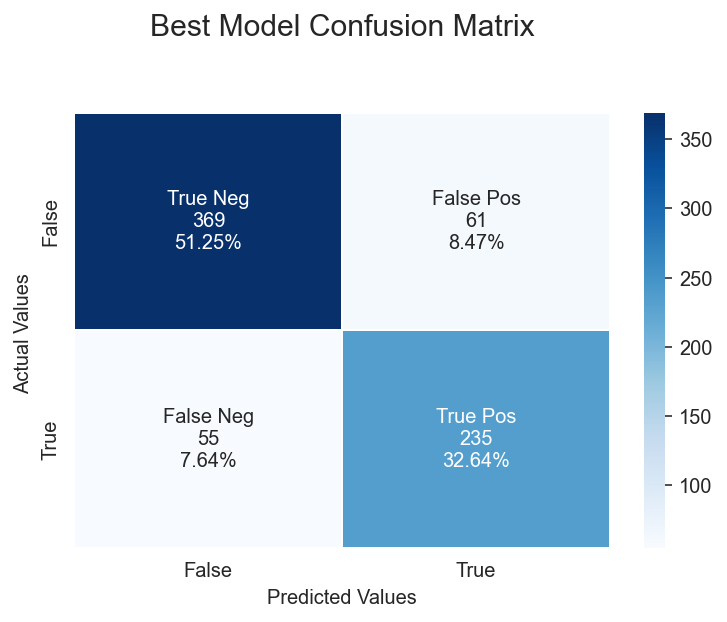

In [93]:
gbc_cm = confusion_matrix(y_test, gbc_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_sum = ['{0:0.0F}'.format(value) for value in gbc_cm.flatten()]

group_percent = ['{0:.2%}'.format(value) for value in 
                 gbc_cm.flatten()/np.sum(gbc_cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
         zip(group_names, group_sum, group_percent)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(gbc_cm, annot=labels, fmt='', linewidths=0.75, cmap='Blues')

ax.set_title('Best Model Confusion Matrix\n\n', size=15);
ax. set_xlabel("Predicted Values")
ax. set_ylabel('Actual Values ');
#
# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True']);

### Summary of Best Model Results

In [94]:
best_model_result = pd.DataFrame(columns=['CV ROC-AUC', 'ROC-AUC', 'Precision', 'Recall'], 
                                 index=['Tuned GradientBoosting'])

best_model_result.loc['Tuned GradientBoosting', 'CV ROC-AUC'] = round(gbc_best_score *100, 3)
best_model_result.loc['Tuned GradientBoosting', 'ROC-AUC'] = round(gbc_roc_auc, 3)
best_model_result.loc['Tuned GradientBoosting', 'Precision'] = round(gbc_precision, 3)
best_model_result.loc['Tuned GradientBoosting', 'Recall'] = round(gbc_recall, 3)
best_model_result

CV ROC-AUC ROC-AUC Precision  Recall
Tuned GradientBoosting     92.321  92.226    79.392  81.034

# 6. Conclusions

We have developed a resuable model pipeline, the optimized model is able to solve the business problem of predicting customer car insurance purchase with given parameters. The model can be deployed - used to make predictions on new data.

Our Approach:

- We started out with a detailed exploratory data analysis of the data, analyzing the descriptive and target features.
- Next, we cleaned and prepared the data for machine learning.
    - Encoded the categorical features
    - We carried our feature engineering, creating new features for the data
    - Split the data into training and testing sets
- We decided on models to use, our model evaluation strategy and metric selection
    - We settled on **ROC-AUC** metric since the target feature is imbalanced
    - We tried 7 different classifers
- We compare and evaluate models results choosing best model (**GradientBoosting**) and tuned hyperparameters.
- We inspect best model (**Tuned-GradientBoosting**) predicitons on hold-out test set.

**From the review of the fitted models above, the best model (Tuned Gradient Boosting) achieved a mean CV ROC-AUC score of 92.321%. On the holdout test set, the best model achieves a 92.226% ROC-AUC, with a Precision score of 0.79392 on 1's, out of all customers that the model thinks will purchase car insurance, 79.392% actually do, and with a Recall score of 0.81034 on the 1's, the model is able to highlight 81.034% of those customers who will purchase car insurance.**

The threshold that our model needs to reach depends on the business need. We can tune the model threshold to some extent to optimize for different metrics.

In [95]:
final_model_results = pd.concat([fe_model_results, best_model_result], axis=0)
final_model_results.sort_values(by=['CV ROC-AUC'], ascending=False, inplace=True)
final_model_results

CV ROC-AUC ROC-AUC Precision  Recall
Tuned GradientBoosting     92.321  92.226    79.392  81.034
GradientBoosting           92.095  91.702    78.571  79.655
RandomForest               91.861  91.059    77.152  80.345
SVC                        91.387  90.576     79.93  78.276
LogisticRegression         91.064  89.728    80.784  71.034
ExtraTrees                 90.533  90.801    78.571  72.069
AdaBoost                   90.528  89.767    77.737  73.448
KNeighbors                  84.45  84.057    76.892  66.552
Dummy                        50.0    50.0    40.278   100.0

In [96]:
final_model_results['CV ROC-AUC'].iplot(kind='bar',
                                        title='<b>Model Comparison by CV ROC-AUC<b>')

## 6.1 Save Best Model

In [97]:
# Fit best model on all the data
gbc.fit(X, y);

In [98]:
import joblib
joblib.dump(gbc, '../03-model/customer-purchase-insurance-gbc-model-v1.pkl', compress=1)
print('Best Model Saved!!')

Best Model Saved!!


# 7. Model Testing

## 7.1 Load Model

In [99]:
best_model = joblib.load('../03-model/customer-purchase-insurance-gbc-model-v1.pkl')
best_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15c3a3310>),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15c2807f0>)])),
                ('model',
                 GradientBoostingClassifier(n_estimators=250,
                                            random_state=999))])

## 7.2 Load New Data

In [100]:
test_data = pd.read_csv('../02-data/customer-purchase-insurance-testset.csv')
print('The data has been successfully imported!')

The data has been successfully imported!


In [101]:
test_data.head()

Id  Age          Job   Marital  Education  Default  Balance  HHInsurance  \
0  2146   44  blue-collar   married    primary        0        0            1   
1  3853   27   technician    single  secondary        0       90            0   
2  2313   34   management   married   tertiary        0      606            0   
3  1638   42   technician  divorced   tertiary        0       21            1   
4  1669   33   management   married   tertiary        0      148            0   

   CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
0        0      cellular               6              may             1   
1        0      cellular               2              feb             3   
2        0      cellular              20              apr             1   
3        0           NaN              20              jun             7   
4        0           NaN              20              may             1   

   DaysPassed  PrevAttempts Outcome            CallStart              CallEnd  \
0          -1             0     NaN  2021-12-09 13:09:20  2021-12-09 13:09:37   
1          -1             0     NaN  2021-12-09 13:01:49  2021-12-09 13:03:11   
2          -1             0     NaN  2021-12-09 17:09:17  2021-12-09 17:10:54   
3          -1             0     NaN  2021-12-09 14:56:33  2021-12-09 14:56:42   
4          -1             0     NaN  2021-12-09 14:01:31  2021-12-09 14:13:28   

   CarInsurance  CallDuration  CallHourStart  CallMinStart  
0             0          17.0             13             9  
1             0          82.0             13             1  
2             1          97.0             17             9  
3             0           9.0             14            56  
4             0         717.0             14             1

In [102]:
test_data.shape

(400, 22)

In [103]:
X_new = test_data.drop(['Id', 'CallStart', 'CallEnd', 'CarInsurance'], axis=1)
y_true = test_data['CarInsurance']
print('The shape of X_new:', X_new.shape)
print('The shape of y_true:', y_true.shape)

The shape of X_new: (400, 18)
The shape of y_true: (400,)


## 7.3 Make Preditions 

In [104]:
model_pred = best_model.predict(X_new)

In [105]:
predictions = pd.DataFrame({'ModelPrediction': model_pred, 'ActualResult': y_true})
predictions.head()

ModelPrediction  ActualResult
0                0             0
1                0             0
2                0             1
3                0             0
4                1             0

In [106]:
test_data['CarInsurance_ModelPrediction'] = model_pred
test_data.drop(['CallDuration', 'CallHourStart', 'CallMinStart'], axis=1, inplace=True)

In [107]:
test_data.head()

Id  Age          Job   Marital  Education  Default  Balance  HHInsurance  \
0  2146   44  blue-collar   married    primary        0        0            1   
1  3853   27   technician    single  secondary        0       90            0   
2  2313   34   management   married   tertiary        0      606            0   
3  1638   42   technician  divorced   tertiary        0       21            1   
4  1669   33   management   married   tertiary        0      148            0   

   CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
0        0      cellular               6              may             1   
1        0      cellular               2              feb             3   
2        0      cellular              20              apr             1   
3        0           NaN              20              jun             7   
4        0           NaN              20              may             1   

   DaysPassed  PrevAttempts Outcome            CallStart              CallEnd  \
0          -1             0     NaN  2021-12-09 13:09:20  2021-12-09 13:09:37   
1          -1             0     NaN  2021-12-09 13:01:49  2021-12-09 13:03:11   
2          -1             0     NaN  2021-12-09 17:09:17  2021-12-09 17:10:54   
3          -1             0     NaN  2021-12-09 14:56:33  2021-12-09 14:56:42   
4          -1             0     NaN  2021-12-09 14:01:31  2021-12-09 14:13:28   

   CarInsurance  CarInsurance_ModelPrediction  
0             0                             0  
1             0                             0  
2             1                             0  
3             0                             0  
4             0                             1

In [108]:
test_data.to_csv('../02-data/customer-purchase-insurance-testset-predictions.csv')
print('Model predictions has been successfully saved to csv file!')

Model predictions has been successfully saved to csv file!


## Evaluate Predictions

In [109]:
comparison = model_pred == y_true
np.unique(comparison, return_counts=True)

(array([False,  True]), array([ 55, 345]))

### Confusion Matrix

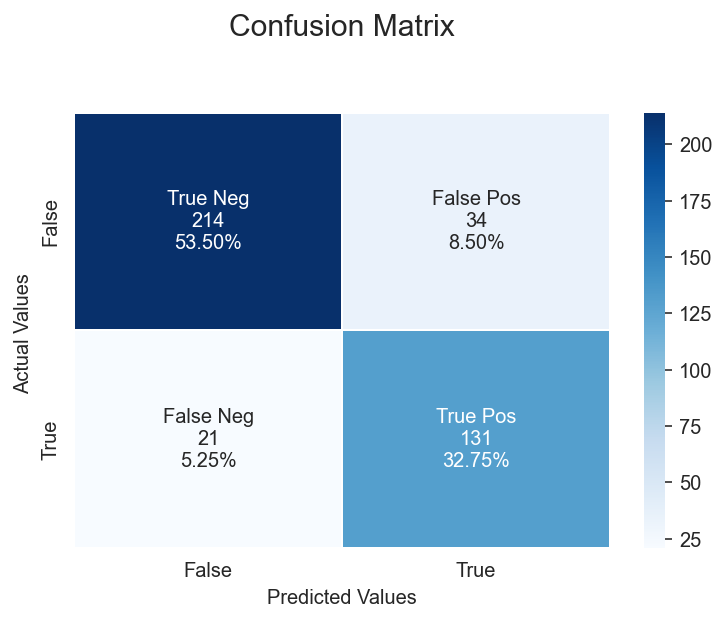

In [110]:
cm = confusion_matrix(y_true, model_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_sum = ['{0:0.0F}'.format(value) for value in cm.flatten()]

group_percent = ['{0:.2%}'.format(value) for value in 
                 cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
         zip(group_names, group_sum, group_percent)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', linewidths=0.75, cmap='Blues')

ax.set_title('Confusion Matrix\n\n', size=15);
ax. set_xlabel("Predicted Values")
ax. set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True']);

### Classification Report

In [111]:
cr = classification_report(y_true, model_pred)
print(f'Classification Report\n\n{cr}')

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       248
           1       0.79      0.86      0.83       152

    accuracy                           0.86       400
   macro avg       0.85      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



# 9. Reproducibility

In [112]:
%watermark -a 'Rainier Goubault' -n -m -v -iv 

Author: Rainier Goubault

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 21.1.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

sklearn   : 1.0.1
joblib    : 1.1.0
cufflinks : 0.17.3
matplotlib: 3.5.0
plotly    : 5.4.0
numpy     : 1.21.4
scipy     : 1.7.3
json      : 2.0.9
pandas    : 1.3.4
seaborn   : 0.11.2

